### Jiang_Puyi_HW2
#### Combined Cycle Power Plant Data

Name: Puyi Jiang
<br>
USC ID: 1161882756
<br>
Referrence: https://www.geeksforgeeks.org/linear-regression-python-implementation/

In [233]:
# pip install pandas openpyxl
# pip install statsmodels

(a) Download the Combined Cycle Power Plant data1 from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [234]:
import pandas as pd
import numpy as np


In [235]:
#file_path = "/Users/perperper/Downloads/DSCI_552/HW2/data/CCPP/Folds5x2_pp.xlsx" 
# remember to change the path to your file
file_path = ".../data/CCPP/Folds5x2_pp.xlsx"

df = pd.read_excel(file_path, engine="openpyxl")

print(df.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

(b) Exploring the data:
<br>i. 
How many rows are in this data set? How many columns? What do the rows and columns represent?

In [236]:
df.shape

(9568, 5)

Answer:
<br>
There are 9568 rows and 5 columns in the dataset. The columns represent the features, including Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP, PE in the dataframe) of the plant.
Each row represents the hourly observation of the power plant.

ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

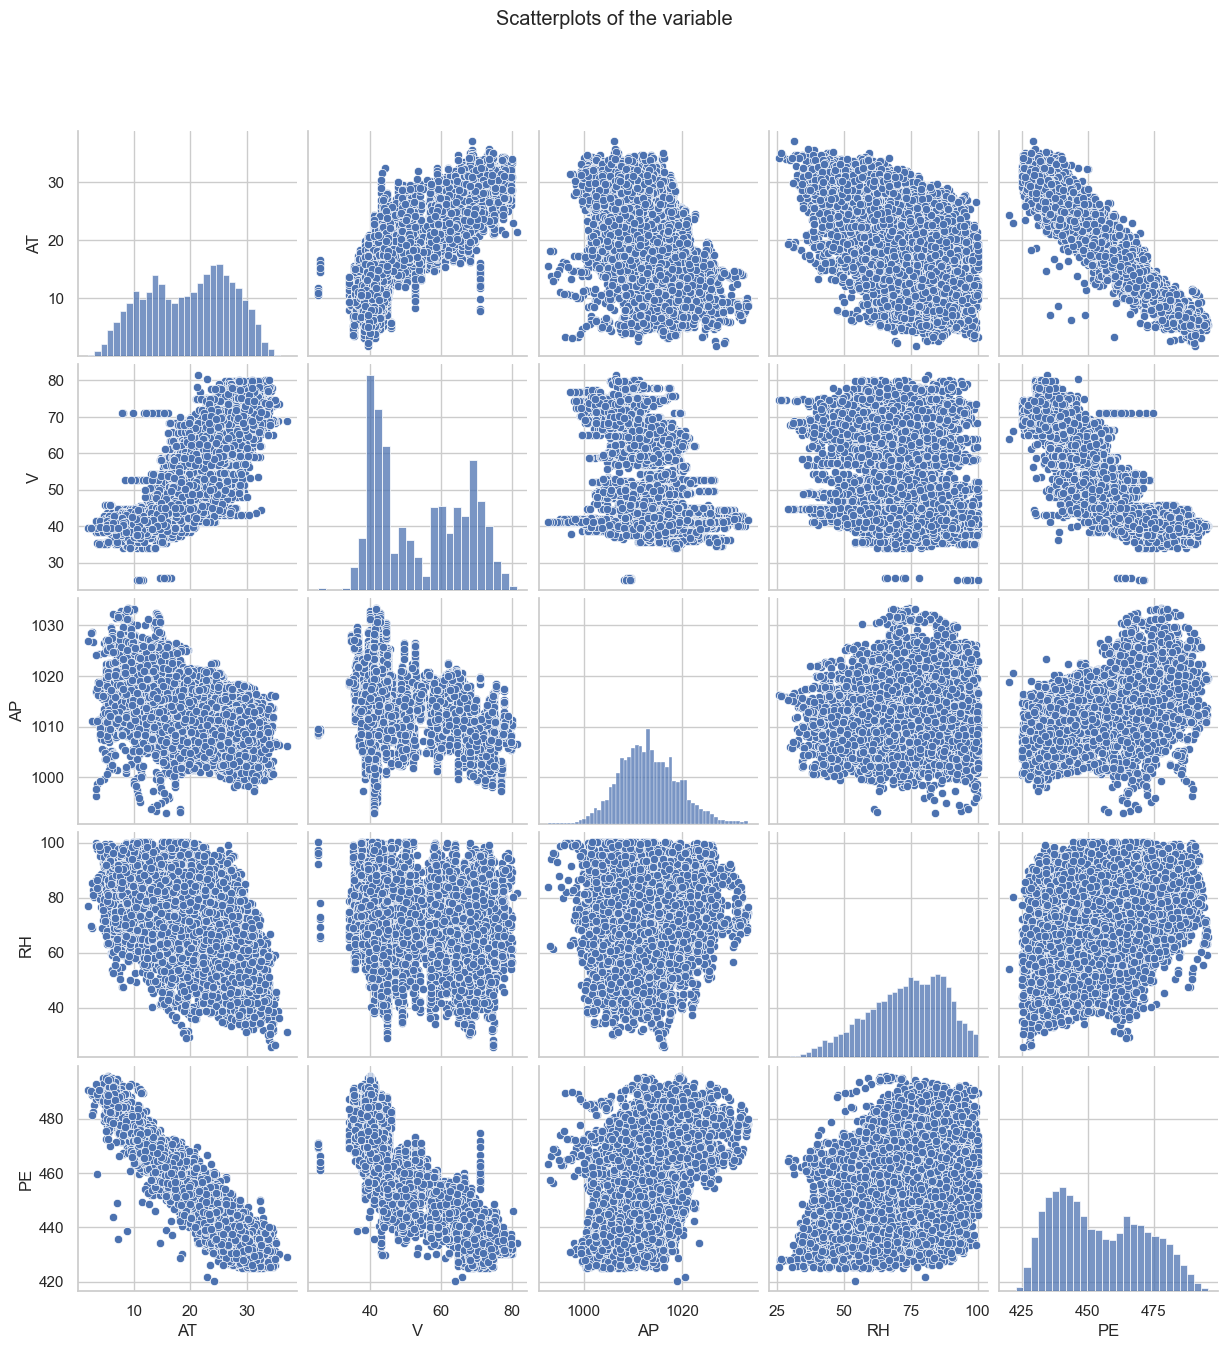

In [238]:
sns.set(style="whitegrid")
s = sns.pairplot(df)
s.fig.suptitle('Scatterplots of the variable', y=1.08)
plt.show()

<br>
The scatterplots show that the power output(PE) is negatively correlated with temperature(AT) and exhaust vacuum(v).
The correlation between power output and  pressure, humidity is hard to define from the plot.

iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [239]:
mean = df.mean()

median = df.median()

range = df.max() - df.min()

Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

# Using gpt to show the summary statistics
# Interquartile Range (IQR = Q3 - Q1)
IQR = Q3 - Q1

summary_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Range": range,
    "Q1 (25%)": Q1,
    "Q3 (75%)": Q3,
    "IQR": IQR
})

print(summary_df)

           Mean    Median  Range   Q1 (25%)  Q3 (75%)      IQR
AT    19.651231    20.345  35.30    13.5100     25.72  12.2100
V     54.305804    52.080  56.20    41.7400     66.54  24.8000
AP  1013.259078  1012.940  40.41  1009.1000   1017.26   8.1600
RH    73.308978    74.975  74.60    63.3275     84.83  21.5025
PE   454.365009   451.550  75.50   439.7500    468.43  28.6800


(c) For each preditor, fit a simple llinear regression model to predict the response.<br>
Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [240]:
import statsmodels.api as sm

In [241]:
univ_coeffs = {}

def linear_regression(x, y):
    predictors = [x]
    response = y

    model_summaries = {}

    # Fit regression models
    for predictor in predictors:
        X = df[[predictor]]  
        X_train_model= sm.add_constant(X)  
        y = df[response] 

        reg_model = sm.OLS(y, X_train_model).fit() 
        model_summaries[predictor] = reg_model.summary()  

        print(reg_model.summary())

        # Make preditcions
        y_pred = reg_model.predict(X_train_model)

        # Store coefficients for later use
        coefficient = reg_model.params[predictor]

        # Plot regression line
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, color='blue', alpha=0.5, s=5, label="Actual Data")
        plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")
        plt.xlabel(predictor)
        plt.ylabel(response)
        plt.title(f"{predictor} vs {response}")
        plt.legend()
        plt.show()

        # Get influence measures
        influence = reg_model.get_influence()
        cooks_d, _ = influence.cooks_distance

        # Set threshold (4/n rule)
        n = len(df)
        threshold = 4 / n

        # Plot Cook's Distance
        plt.figure(figsize=(6,4))
        plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
        plt.axhline(y=threshold, color='r', linestyle="--", label="Threshold (4/n)")
        plt.xlabel("Observation Index")
        plt.ylabel("Cook's Distance")
        plt.title("Cook's Distance for Each Observation")
        plt.legend()

    return coefficient


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:19:03   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

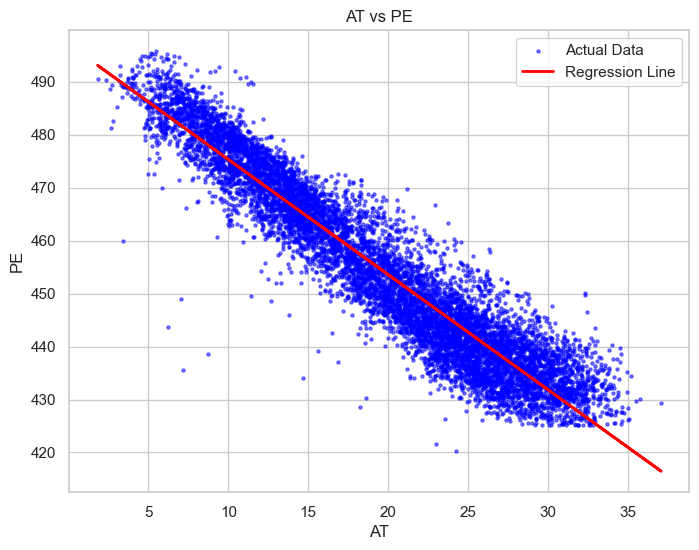

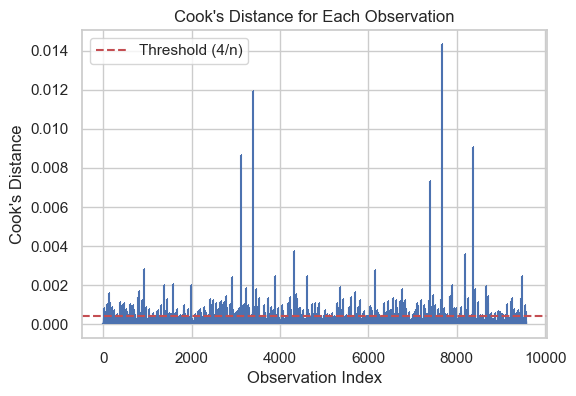

In [242]:
# Temperature
univ_coeffs["AT"] = linear_regression("AT", "PE")

Temperature: <br>
Given the scatter plot, we can see that the relationship between temperature and energy output is negative correlation. <br>
Since P-value is less than 0.05, we can conclude that the relationship between temperature and energy output is statistically significant. <br>
The R-squared value is 0.899, meaning that 89.9% of the variance in energy output can be explained by temperature. <br>
The cook's distance plot shows that there are several obvious outliers in the data since most of the data points are below the threshold line.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:19:03   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

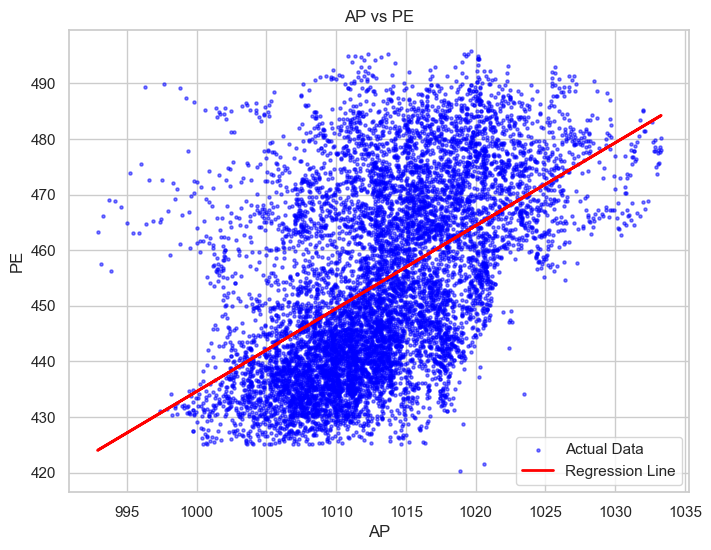

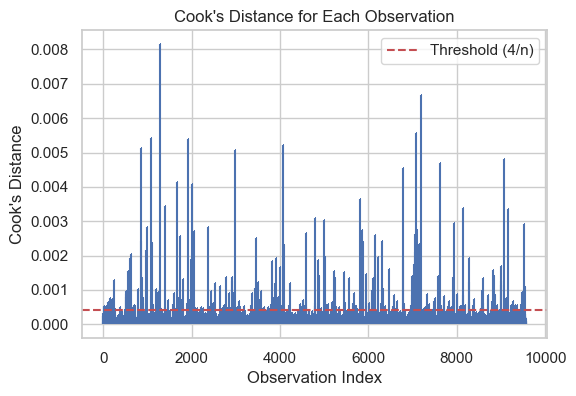

In [243]:
# Pressure
univ_coeffs["AP"] = linear_regression("AP", "PE")


Ambient Pressure:<br>
Given the scatter plot, we can see that the relationship between atmospheric pressure and energy output is negative correlation. <br>
P-value is less than 0.05, so we can reject the null hypothesis. The atmospheric pressure is statistically significant in predicting the energy output.<br>
There are some outliers in the scatter plot, since the Cook's distance is larger than the threshold of 4/n.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:19:04   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

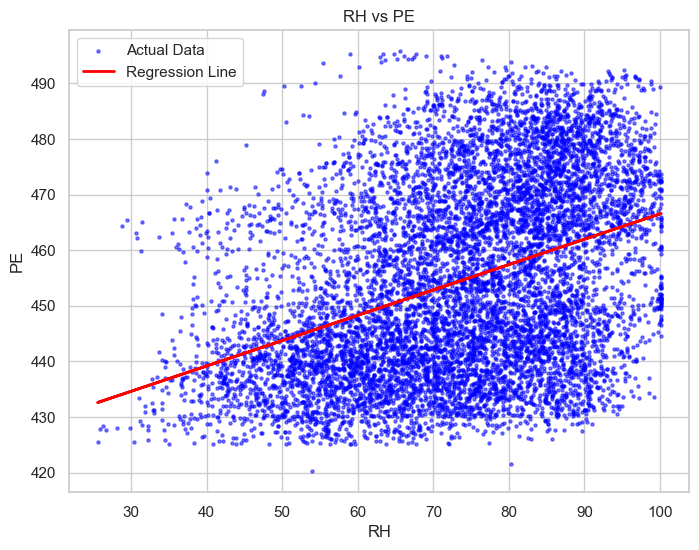

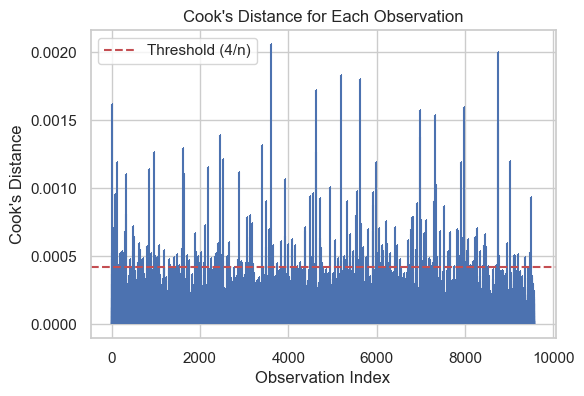

In [244]:
# Humidity
univ_coeffs["RH"] = linear_regression("RH", "PE")

Humidity: <br>
Given the scatter plot, we can see that the relationship between relative humidity and energy output has positive correlation. <br>
P value is less than 0.05, so we can reject the null hypothesis. The relative humidity is statistically significant in predicting the energy output.<br>
There are outliers in the data because the Cook's distance is greater than the threshold.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:19:04   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

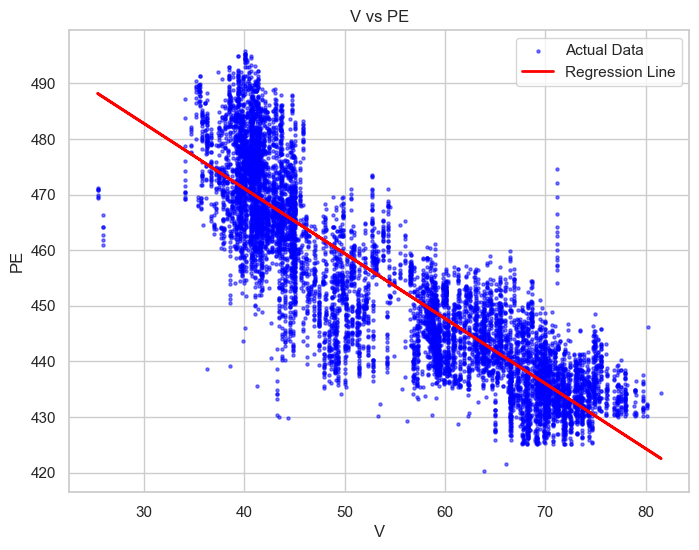

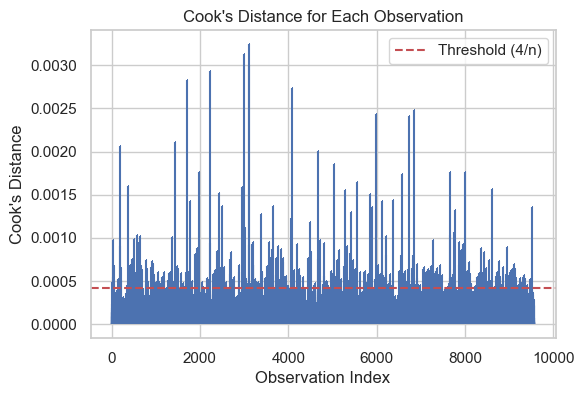

In [245]:
# Vaccume
univ_coeffs["V"] = linear_regression("V", "PE")


Vaccum:<br>
Given the scatter plot, we can see that the relationship between exhaust vacuum and energy output has negative correlation. <br>
The p-value is less than 0.05, which indicates that the relationship is statistically significant. <br>
There are potential outliers because the Cook's distance is greater than the threshold of 4/n.

(d) Fit a multiple regression model to predict the response using all of the predictors. <br>
Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [246]:
predictors = ["AT", "V", "AP", "RH"]
response = "PE"

# Define independent variables and dependent variable
X = df[predictors]
y = df[response]
X_train_model = sm.add_constant(X)     # Add a constant term for the intercept

# Fit the multiple linear regression model
multi_reg = sm.OLS(y, X).fit()

print(multi_reg.summary())

multi_coeffs = multi_reg.params[predictors]
print(multi_coeffs)


                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.939e+07
Date:                Fri, 14 Feb 2025   Prob (F-statistic):                        0.00
Time:                        21:19:04   Log-Likelihood:                         -29068.
No. Observations:                9568   AIC:                                  5.814e+04
Df Residuals:                    9564   BIC:                                  5.817e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We can see that the p-value of all the predictors(AT, V, AP, RH) are less than 0.05, which means that the null hypothesis (H0 :βj =0) can be rejected. Therefore, all the predictors are statistically significant in predicting the response variable.

e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [247]:
univ_coeffs

{'AT': np.float64(-2.171319958517796),
 'AP': np.float64(1.4898716733991142),
 'RH': np.float64(0.45565010226298064),
 'V': np.float64(-1.168135126555711)}

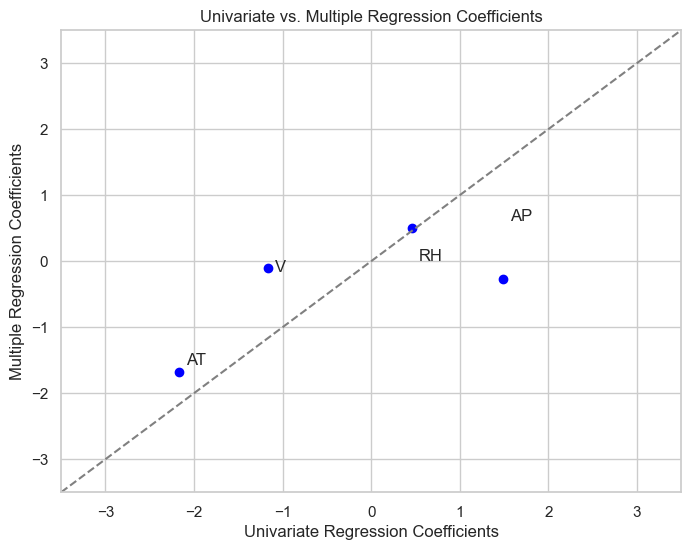

In [248]:
# Scatter Plot
plt.subplots(figsize=(8, 6))
plt.scatter(univ_coeffs.values(), multi_coeffs.values, color='blue')

# Annotate points with predictor names
for predictor in predictors:
    plt.annotate(predictor, (univ_coeffs[predictor], multi_coeffs[predictor]), textcoords="offset points", xytext=(5,5))

# Add y=x reference line
plt.axline((0, 0), slope=1, linestyle="--", color="gray")
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Univariate vs. Multiple Regression Coefficients")
plt.grid(True)
plt.show()

f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
<br>
Y =β0 +β1X+β2X2 +β3X3 +ε
<br>

In [249]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [260]:
def polynominal_regression(predictor, response):
    # 
    X = df[[predictor]]
    y = df[response] 

    # Include polynomial feature for x_train with degree of 3
    poly = PolynomialFeatures(3)
    X_train_model = poly.fit_transform(X)
    
    # Fit OLS model
    OLS_model = sm.OLS(y, X_train_model).fit()
    
    # Display model summary
    print(OLS_model.summary())

In [261]:
# Temperature
polynominal_regression('AT', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:35:38   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

Temperature: <br>
P-value of the cubic term is less than 0.05, which indicates that the cubic term is statistically significant. 
So we reject the null hypothesis that the cubic term is not significant, temperature has a cubic relationship with power output.

In [262]:
# Pressure
polynominal_regression('AP', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:35:42   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

Pressure: <br>
P value is less than 0.05, so we reject the null hypothesis and conclude that the predictor is significant. 
This means that ambient pressure has non-linear relationship with the response energy output.

In [265]:
# Humidity
polynominal_regression('RH', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:35:46   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

Humidity: <br>
P value is less than 0.05, so we reject the null hypothesis and conclude that the predictor is significant. 
This means that relative humidity has non-linear relationship with the response energy output.

In [266]:
# Vaccume
polynominal_regression('V', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:35:50   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

Vacuum: <br>
P value is 0.014, which is less than 0.05, so we reject the null hypothesis and conclude that the predictor is significant. 
This means that exhaust vacuum has non-linear relationship with the response energy output.

(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.


In [289]:
predictors = ["AT", "V", "AP", "RH"]
response = "PE"

# Create interaction terms
X = df[predictors]
y = df[response]
poly = PolynomialFeatures(interaction_only=True)                                           
X_interact = poly.fit_transform(X)

# Get feature names
feature_names = poly.get_feature_names_out(predictors)
columns = list(feature_names)
X_interact_df = pd.DataFrame(X_interact, columns=columns)

# Fit full linear regression model
full_linear_model = sm.OLS(y, X_interact_df).fit()
    
# Display model summary
print(full_linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:02:59   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            685.7825     78.640      8.721      0.0

In [ ]:
# Using gpt to replace the interaction terms with the feature names
# columns = list(feature_names)  # Include the intercept term
# X_interact_df = pd.DataFrame(X_interact, columns=columns)
# X_interact_df

P values of the interaction terms are all less than 0.05, which means that the interaction terms are statistically significant.

(h) Can you improve your model using possible interaction terms or nonlinear asso- ciations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = df["PE"]
X = df.drop(columns="PE")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add constant for intercept
X_train_sm = sm.add_constant(X_train) 

# Train a model with all predictors 
all_reg_model = sm.OLS(y_train, X_train_sm).fit()

# Predict and calculate MSE for training and testing sets
y_train_pred = all_reg_model.predict(X_train_sm)
y_test_pred = all_reg_model.predict(sm.add_constant(X_test))

all_reg_train_mse = mean_squared_error(y_train, y_train_pred)
all_reg_test_mse = mean_squared_error(y_test, y_test_pred)

print(all_reg_model.summary())

# Print Model MSEs
print("All preditors regression Model MSE (Train):", all_reg_train_mse)
print("All preditors regression Model MSE (Test):", all_reg_test_mse)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:59:23   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.8414     11.502     40.673      0.0

In [343]:
# Create interaction and quadratic terms
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Add constant for intercept
X_train_poly_sm = sm.add_constant(X_train_poly)
X_test_poly_sm = sm.add_constant(X_test_poly)

# Fit the model with interaction and quadratic terms
poly_model = sm.OLS(y_train, X_train_poly_sm).fit()

print(poly_model.summary())

y_train_pred_poly = poly_model.predict(X_train_poly_sm)
y_test_pred_poly = poly_model.predict(sm.add_constant(X_test_poly))

poly_train_mse = mean_squared_error(y_train, y_train_pred_poly)
poly_test_mse = mean_squared_error(y_test, y_test_pred_poly)


print("Polynomial Model MSE (Train):", poly_train_mse)
print("Polynomial Model MSE (Test):", poly_test_mse)



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:52:16   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.0

(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.


In [315]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Extract predictor data (make sure to convert to numpy array)
X = df[predictors].values
y = df[response].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def knn_regression(X_train, X_test, y_train, y_test, k_range):
    train_errors = []
    test_errors = []
    
    for k in k_range:
        # Create a KNN regression model
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate MSE for both train and test sets
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        train_errors.append(train_mse)
        test_errors.append(test_mse)
    
    return train_errors, test_errors

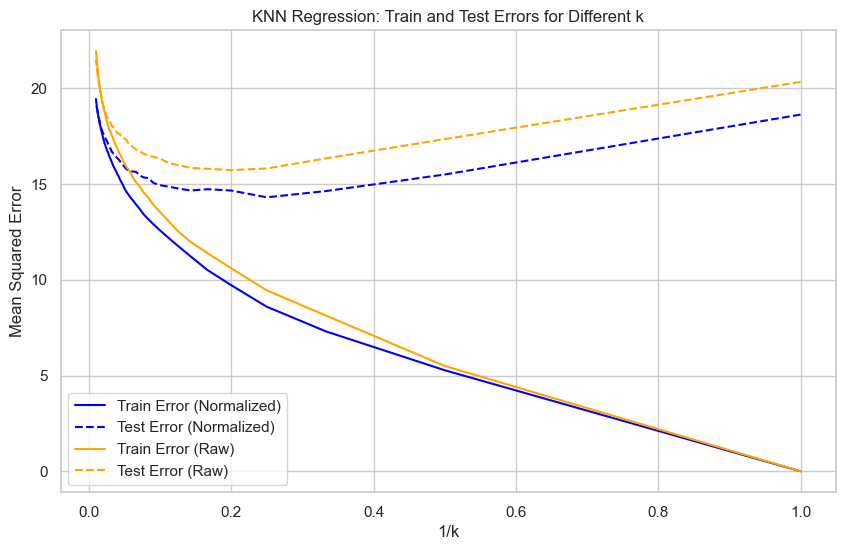

In [320]:
# K range from 1 to 100
k_range = np.arange(1, 101)

# Perform KNN regression on normalized data
train_errors_scaled, test_errors_scaled = knn_regression(X_train_scaled, X_test_scaled, y_train, y_test, k_range)

# Perform KNN regression on raw data
train_errors_raw, test_errors_raw = knn_regression(X_train, X_test, y_train, y_test, k_range)

# Plot errors for normalized features
plt.figure(figsize=(10, 6))
plt.plot(1/k_range, train_errors_scaled, label="Train Error (Normalized)", color="blue")
plt.plot(1/k_range, test_errors_scaled, label="Test Error (Normalized)", color="blue", linestyle='dashed')

# Plot errors for raw features
plt.plot(1/k_range, train_errors_raw, label="Train Error (Raw)", color="orange")
plt.plot(1/k_range, test_errors_raw, label="Test Error (Raw)", color="orange", linestyle='dashed')

# Labels and title
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression: Train and Test Errors for Different k')
plt.legend()
plt.grid(True)
plt.show()


(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.


In [345]:
# Find the best k and MSE
best_test_mse_raw  = min(test_errors_raw)
best_k_raw = k_range[test_errors_raw.index(best_test_mse_raw)]

best_test_mse_scaled = min(test_errors_scaled)
best_k_scaled = k_range[test_errors_scaled.index(best_test_mse_scaled)]

# Train
train_mse_raw = train_errors_raw[best_k_raw]
train_mse_scaled = train_errors_scaled[best_k_scaled]

# save mse values for all models
mse_results = pd.DataFrame({
    "Model": ["All_predictor", "Polynomial","KNN_raw","kNN_scaled"],
    "Train MSE": [all_reg_train_mse, poly_train_mse,train_mse_raw,train_mse_scaled],
    "Test MSE": [all_reg_test_mse, poly_test_mse,best_test_mse_raw,best_test_mse_scaled]
})
mse_results

,Model,Train MSE,Test MSE
0,All_predictor,20.580840,21.239857
1,Polynomial,17.887800,18.647312
2,KNN_raw,11.387236,15.726820
3,kNN_scaled,9.717295,14.305669


kNN_scaled model has the lowest test MSE, however, the all_predictor_regression model has the lowest train MSE and it doest not have overfitting issue.

2. ISLR: 2.4.1<br>
For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predic- tors p is small.
<br> Use linear regression model because it is less likely to be overfitting and is easier to interpret. So Inflexible method performs better.



(b) The number of predictors p is extremely large, and the number of observations n is small.<br>
Neither inflexible method nor flexible method perform better, because there are too little sample sizes.

(c) The relationship between the predictors and response is highly non-linear.<br>
Flexible method model performs better since inflexible method assumes predictors and response are linear correlated.

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.<br>
Inflexible method performs better since inflexible methods are less sensitive to the variance in the data.

3. ISLR: 2.4.7 The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Obs. <br>
Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
<br>
(a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.
(b) What is our prediction with K = 1? Why?
(c) What is our prediction with K = 3? Why?
(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?



In [333]:
# (a)
# # Given dataset
data = {
    "Obs": [1, 2, 3, 4, 5, 6],
    "X1": [0, 2, 0, 0, -1, 1],
    "X2": [3, 0, 1, 1, 0, 1],
    "X3": [0, 0, 3, 2, 1, 1],
    "Y": ["Red", "Red", "Red", "Green", "Green", "Red"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define test point
test_point = np.array([0, 0, 0])

# Compute Euclidean distance for each observation
df["Distance"] = np.sqrt((df["X1"] - test_point[0])**2 + 
                         (df["X2"] - test_point[1])**2 + 
                         (df["X3"] - test_point[2])**2)

df

,Obs,X1,X2,X3,Y,Distance
0,1,0,3,0,Red,3.000000
1,2,2,0,0,Red,2.000000
2,3,0,1,3,Red,3.162278
3,4,0,1,2,Green,2.236068
4,5,-1,0,1,Green,1.414214
5,6,1,1,1,Red,1.732051


(b) What is our prediction with K = 1? Why?<br>
The nearest observation is 5. Predition is green.
<br>
<br>
(c) What is our prediction with K = 3? Why?<br>
The most three nearest observations are obs5, obs6 and obs2. So preditor should be red.
<br>
<br>
(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?<br>
We expect the K to be small because A large 𝐾 averages over many observations, which tends to linearize the decision boundary.